In [4]:
import yfinance as yf
import pandas as pd
from arch import arch_model

# Download data from Yahoo Finance

In [7]:
data = yf.download('AAPL', start='2010-01-01', end='2024-07-19')

[*********************100%%**********************]  1 of 1 completed


In [8]:
display(data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800
...,...,...,...,...,...,...
2024-07-12,228.919998,232.639999,228.679993,230.539993,230.539993,53008200
2024-07-15,236.479996,237.229996,233.089996,234.399994,234.399994,62631300
2024-07-16,235.000000,236.270004,232.330002,234.820007,234.820007,43234300


# Convert data to returns

In [9]:
returns = data['Adj Close'].pct_change()

# Check for ARCH/GARCH effects

In [11]:
returns = returns.dropna()

In [13]:
returns = returns.fillna(0)

In [14]:
from statsmodels.stats.diagnostic import het_arch
het_arch_test = het_arch(returns)
print(het_arch_test)

(391.32419501260347, 6.603436248854785e-78, 43.70241873880185, 1.4952310812416072e-82)


# Fit an ARCH/GARCH model

In [18]:
returns_rescaled = 100 * returns
model = arch_model(returns_rescaled, mean='Constant', vol='GARCH', p=1, o=1, q=1)

# Forecast three-month volatility

In [19]:
forecasts = res.forecast(horizon=3)
print(forecasts.variance)

                 h.1      h.2      h.3
Date                                  
2024-07-18  0.000432  0.00042  0.00041


In [29]:
data = {'Date': ['2024-07-18'], 
        'h.1': [0.000432], 
        'h.2': [0.00042], 
        'h.3': [0.00041]}
df = pd.DataFrame(data, columns=['Date', 'h.1', 'h.2', 'h.3'])
df['Date'] = pd.to_datetime(df['Date'])

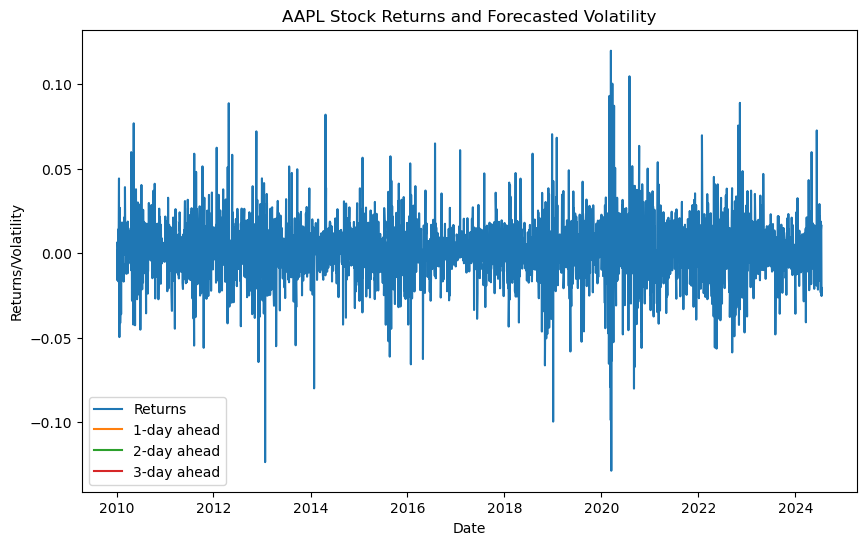

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns.values, label='Returns')
plt.plot(forecasts.variance.index, forecasts.variance['h.1'], label='1-day ahead')
plt.plot(forecasts.variance.index, forecasts.variance['h.2'], label='2-day ahead')
plt.plot(forecasts.variance.index, forecasts.variance['h.3'], label='3-day ahead')
plt.xlabel('Date')
plt.ylabel('Returns/Volatility')
plt.title('AAPL Stock Returns and Forecasted Volatility')
plt.legend()
plt.show()